In [29]:
#필요한 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
#광주지역 2018~2020년 기상데이터 로드
data=pd.read_csv('data/기상개황_광주지역__20230327110805.csv',encoding='cp949')
data

,월별(1),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11,2020.12,2020.13,2020.14,2020.15
0,월별(1),평균기온 (℃),평균최고기온 (℃),최고기온 (℃),평균최저기온 (℃),최저기온 (℃),강수량 (㎜),평균상대습도 (%),최소상대습도 (%),평균해면기압 (hPa),...,평균상대습도 (%),최소상대습도 (%),평균해면기압 (hPa),이슬점온도 (℃),평균운량 (10%),일조시간 (h),최심신적설 (㎝),평균풍속 (㎧),최대풍속 (㎧),최대순간풍속 (㎧)
1,평균,14.6,20.1,38.5,10.3,-11.5,1427.9,71,5,1016.9,...,71,1,1016.9,8.4,5.6,2225.1,16.9,1.6,10.0,19.8
2,1월,-0.2,4.5,11.4,-3.8,-11.5,38.8,67,14,1024.7,...,68,13,1023.4,-1.5,6.3,136.5,-,1.4,10.0,19.8
3,2월,1.8,7.1,15.9,-2.8,-10.0,22.0,54,8,1024.0,...,67,10,1025.1,-1.3,4.9,177.0,10.9,1.4,5.5,10.8
4,3월,10.0,16.5,24.8,4.7,-3.1,115.8,72,5,1020.2,...,58,1,1018.6,-0.3,4.0,242.0,-,1.7,7.9,15.0
5,4월,15.1,21.5,30.2,9.7,1.1,127.4,67,11,1016.0,...,52,5,1018.4,0.4,3.3,278.1,-,1.8,9.1,14.8
6,5월,19.5,25.0,31.1,14.8,7.8,85.4,74,16,1011.8,...,73,12,1010.7,13.0,6.1,211.3,-,1.7,7.9,12.8
7,6월,23.6,29.5,34.5,19.2,15.7,222.4,74,24,1008.0,...,79,21,1006.6,19.1,6.5,191.4,-,1.6,6.9,10.9
8,7월,28.3,33.5,38.5,24.5,20.4,84.5,79,36,1008.4,...,91,49,1006.7,21.6,8.7,69.5,-,1.5,8.3,13.7
9,8월,28.4,33.7,38.5,24.9,20.6,397.1,78,36,1007.1,...,89,50,1009.2,25.4,6.6,169.8,-,2.2,8.4,16.9


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 49 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   월별(1)    14 non-null     object
 1   2018     14 non-null     object
 2   2018.1   14 non-null     object
 3   2018.2   14 non-null     object
 4   2018.3   14 non-null     object
 5   2018.4   14 non-null     object
 6   2018.5   14 non-null     object
 7   2018.6   14 non-null     object
 8   2018.7   14 non-null     object
 9   2018.8   14 non-null     object
 10  2018.9   14 non-null     object
 11  2018.10  14 non-null     object
 12  2018.11  14 non-null     object
 13  2018.12  14 non-null     object
 14  2018.13  14 non-null     object
 15  2018.14  14 non-null     object
 16  2018.15  14 non-null     object
 17  2019     14 non-null     object
 18  2019.1   14 non-null     object
 19  2019.2   14 non-null     object
 20  2019.3   14 non-null     object
 21  2019.4   14 non-null     object
 22  2019

In [32]:
#일조시간만 있는 칼럼 선택
hour=data[['2018.11','2019.11','2020.11']]

In [33]:
hour.columns=['1','2','3']

In [34]:
#총 일조시간만 있는 행 선택
hour=hour.iloc[[1]]

In [35]:
#데이터 확인
hour.reset_index(drop=True,inplace=True)
hour

,1,2,3
0,2372.5,2290.1,2225.1


In [36]:
#지역별, 시간별 태양광 발전량 데이터 로드
data=pd.read_csv('data/한국전력거래소_지역별 시간별 태양광 발전량_20211231.csv',encoding='cp949')
data

,거래일자,거래시간,지역,발전량
0,2018-01-01,1,강원도,13.680
1,2018-01-01,2,강원도,0.000
2,2018-01-01,3,강원도,14.400
3,2018-01-01,4,강원도,0.000
4,2018-01-01,5,강원도,0.000
...,...,...,...,...
596083,2021-12-31,20,충청북도,47668.337
596084,2021-12-31,21,충청북도,41720.571
596085,2021-12-31,22,충청북도,23464.794
596086,2021-12-31,23,충청북도,8098.187


In [37]:
#지역이 광주시만 남기고 데이터 리셋
data.drop(data[data['지역']!='광주시'].index,inplace=True)
data.reset_index(drop=True,inplace=True)

In [38]:
#거래일자에 2018,2019,2020이 들어있는 데이터 분리
data1=data[data['거래일자'].str.contains('2018')]
data2=data[data['거래일자'].str.contains('2019')]
data3=data[data['거래일자'].str.contains('2020')]

In [39]:
#분리한 데이터에 칼럼이름 수정
data1.columns=['거래일자','거래시간','지역','발전량']
data2.columns=['거래일자','거래시간','지역','발전량']
data3.columns=['거래일자','거래시간','지역','발전량']

In [40]:
#데이터 프레임에 넣기
d={'연도':['2018','2019','2020'],'총 태양광발전량':[data1['발전량'].sum(),data2['발전량'].sum(),data3['발전량'].sum()]}
sun=pd.DataFrame(data=d)

In [41]:
sun.astype({'총 태양광발전량':'int'})

,연도,총 태양광발전량
0,2018,49377803
1,2019,61300463
2,2020,69891537


In [42]:
hour=hour.transpose()

In [43]:
#일조시간에 연도 칼럼 넣고, 총 일조시간 타입 변경후 데이터 확인
hour['연도']=['2018','2019','2020']
hour.columns=('총 일조시간','연도')
hour.reset_index(drop=True,inplace=True)
hour['총 일조시간']=hour['총 일조시간'].astype(float)
hour

,총 일조시간,연도
0,2372.5,2018
1,2290.1,2019
2,2225.1,2020


(2000.0, 2500.0)

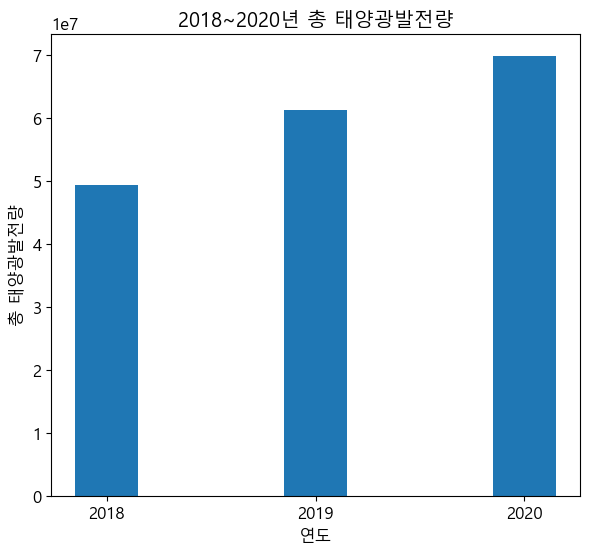

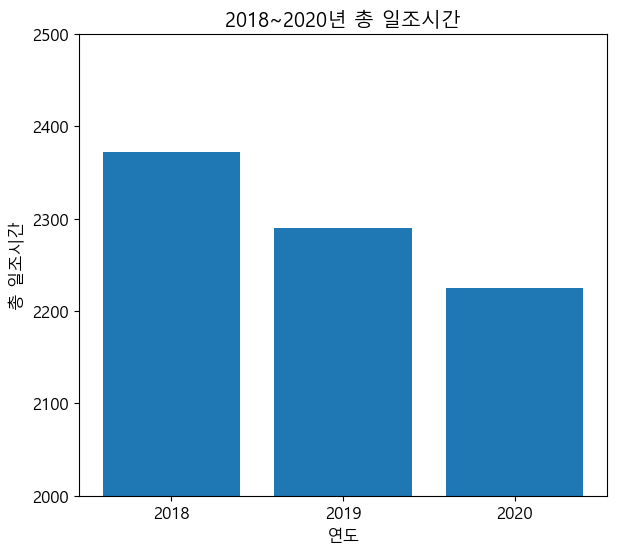

In [44]:
#그래프 표현
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.bar('연도','총 태양광발전량',data=sun,width=0.3)
plt.xlabel('연도')
plt.ylabel('총 태양광발전량')
plt.title('2018~2020년 총 태양광발전량')

plt.figure(figsize=(15,6))
plt.subplot(122)
plt.bar(hour['연도'],hour['총 일조시간'])
plt.xlabel('연도')
plt.ylabel('총 일조시간')
plt.title('2018~2020년 총 일조시간')
plt.ylim(2000,2500)

In [45]:
#설비용량 자료 로드
data=pd.read_csv('data/월별 시도별 신재생연계ESS 설비용량 자료(2018_2020).csv',encoding='cp949')
data

,연도,월,지역,태양광 전체 설비용량(MW),풍력 전체 설비용량,ESS연계 태양광 설비용량,ESS연계 풍력 설비용량,태양광ESS 설비용량,풍력ESS 설비용량
0,2018,1,경기도,106.8,5.3,2.0,3.0,2.0,0.1
1,2018,1,강원도,152.5,323.3,10.5,48.0,8.9,9.0
2,2018,1,경상남도,164.1,47.8,17.3,14.0,15.4,3.0
3,2018,1,경상북도,256.4,337.0,23.1,90.3,21.2,23.8
4,2018,1,전라남도,619.6,206.2,47.6,75.8,40.6,9.3
...,...,...,...,...,...,...,...,...,...
607,2020,12,광주시,56.6,0.0,6.5,0.0,5.0,0.0
608,2020,12,대구시,38.4,0.0,6.9,0.0,6.0,0.0
609,2020,12,세종시,20.7,0.0,3.5,0.0,3.3,0.0
610,2020,12,울산시,26.4,1.7,4.0,0.0,1.8,0.0


In [46]:
#필요한 칼럼 선택후 저장
data=data[['연도','월','지역','태양광 전체 설비용량(MW)']]
data

,연도,월,지역,태양광 전체 설비용량(MW)
0,2018,1,경기도,106.8
1,2018,1,강원도,152.5
2,2018,1,경상남도,164.1
3,2018,1,경상북도,256.4
4,2018,1,전라남도,619.6
...,...,...,...,...
607,2020,12,광주시,56.6
608,2020,12,대구시,38.4
609,2020,12,세종시,20.7
610,2020,12,울산시,26.4


In [47]:
#지역이 광주시인 데이터만 표시
data1=data.groupby('지역').get_group('광주시')
data1

,연도,월,지역,태양광 전체 설비용량(MW)
12,2018,1,광주시,32.3
29,2018,2,광주시,33.3
46,2018,3,광주시,35.1
63,2018,4,광주시,35.1
80,2018,5,광주시,36.9
97,2018,6,광주시,40.2
114,2018,7,광주시,40.6
131,2018,8,광주시,41.7
148,2018,9,광주시,41.7
165,2018,10,광주시,41.7


In [48]:
data1.reset_index(drop=True,inplace=True)

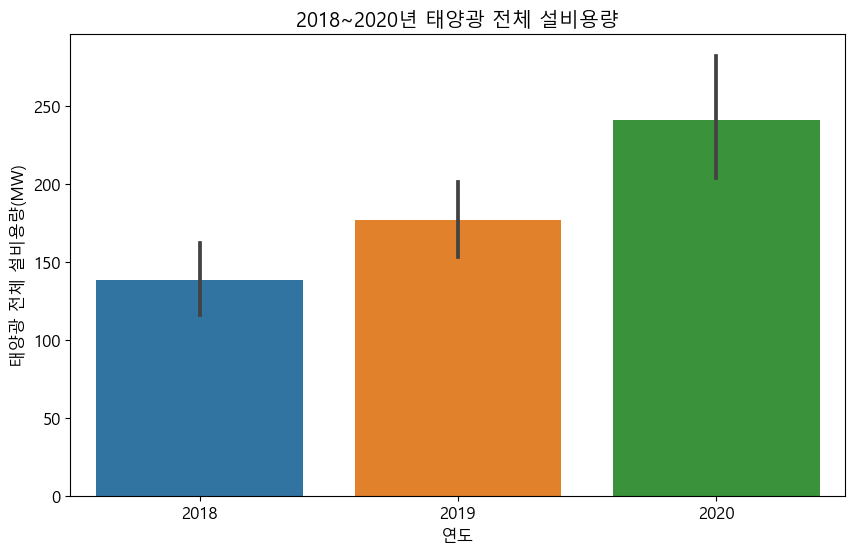

In [49]:
#연도별 태양광 전체설비용량의 평균을 그래프로 표현
data1=data1.groupby('연도')['태양광 전체 설비용량(MW)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=data,x='연도', y='태양광 전체 설비용량(MW)')
plt.title('2018~2020년 태양광 전체 설비용량')
plt.show()